## Data source

StatLib - Carnegie Mellon University

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

## Attribute Information

Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of minorities by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

In [2]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = '/home/znagy2/ds_az/Exploratory-Data-Analysis-and-Machine-Learning/input/boston.csv'
data = pd.read_csv(path)

## Exploratory Data Analysis

### Understanding the variables

I start with understandig the dataset.

In [7]:
data.shape

(506, 14)

I have 14 columns and 506 rows. Let's see the first 5 rows.

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


I'll check missing values by columns.

In [9]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

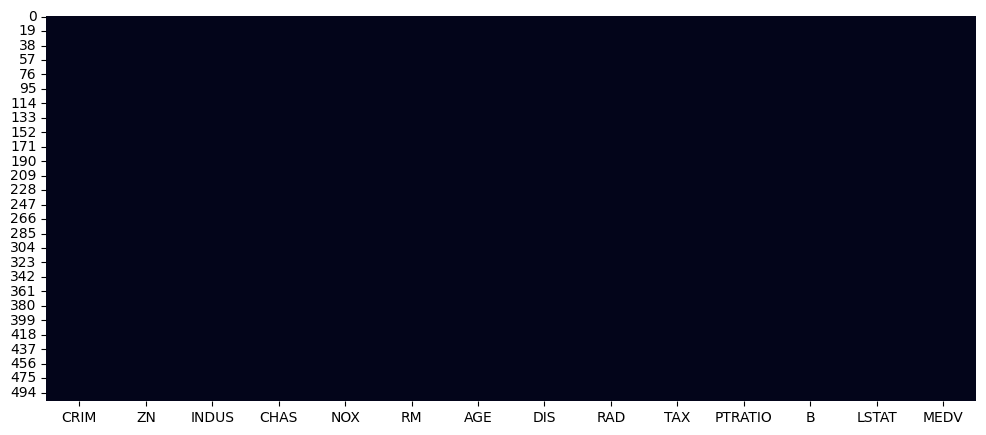

In [10]:
# visualize on a heatmap
plt.figure(figsize=(12,5))
sns.heatmap(data.isnull(), cbar=False)

There is no any missing values in the dataset.
I'll check duplicated rows in the data.

In [11]:
data.duplicated().sum()

0

I do not have any duplicated rows, so I can check the number of unique values by variables.

In [12]:
data.nunique(axis=0)

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

I'll get basic statistic relating the columns.

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


I have only continuous variables but their range varies ona  wide range.
I'll check the data type of columns.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


The dataset is clean:
- data types looks like fine
- missing values were not identified
- duplicated rows were not identified

### Visualize data and relationships
 I'll calculate and plot the correlation matrix, which give me a better insight into the relationship of variables.

<Axes: >

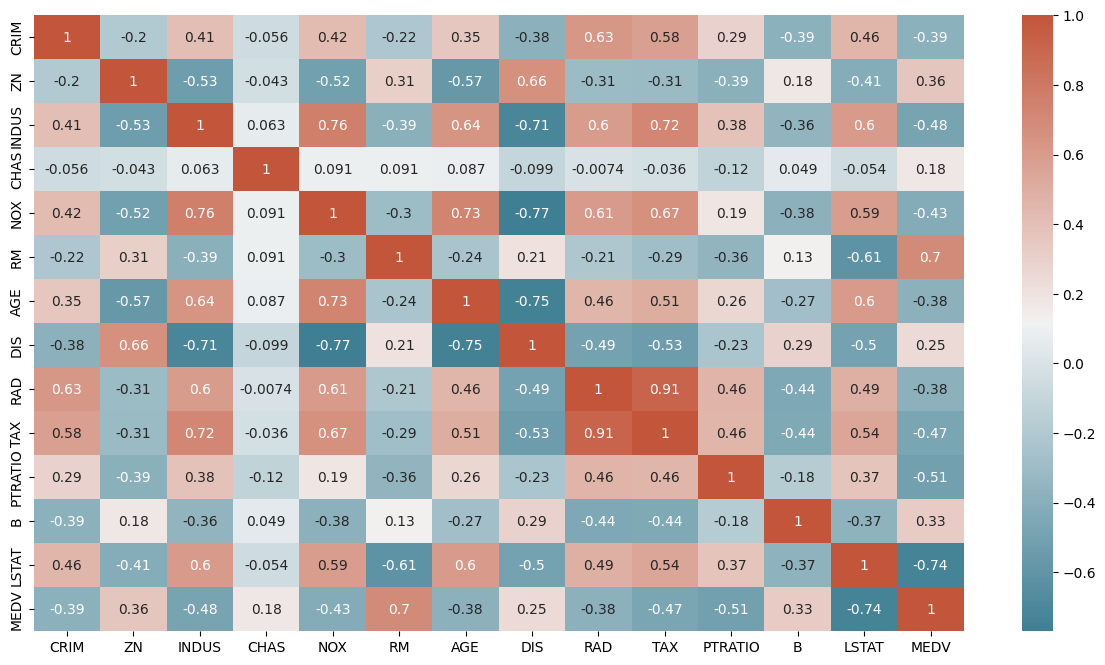

In [15]:
# calculate correlation matrix
corr = data.corr()
# plot the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Due to the several variables I won't go through the whole matrix, but I draw three conclusions:
1. The variables are highly correlated (<-0.5 / >0.5)
2. The CHAS (river bounded or not) variable looks like really independent
3. RM (room number per dwelling) has a positive correlation with the median price value (MEDV)
4. There is a strong positive (0.91) correlation between RAD (accessible rad highway) and TAX (property tax value)
5. MEDV (median property value) correlates with RM (+), PTRATIO (student-teacher ratio) (-) and LSTAT (lower status of population ration) (-)

I'll visualize the correlation between the MEDV, RM, PTRATIO and LSTAT.

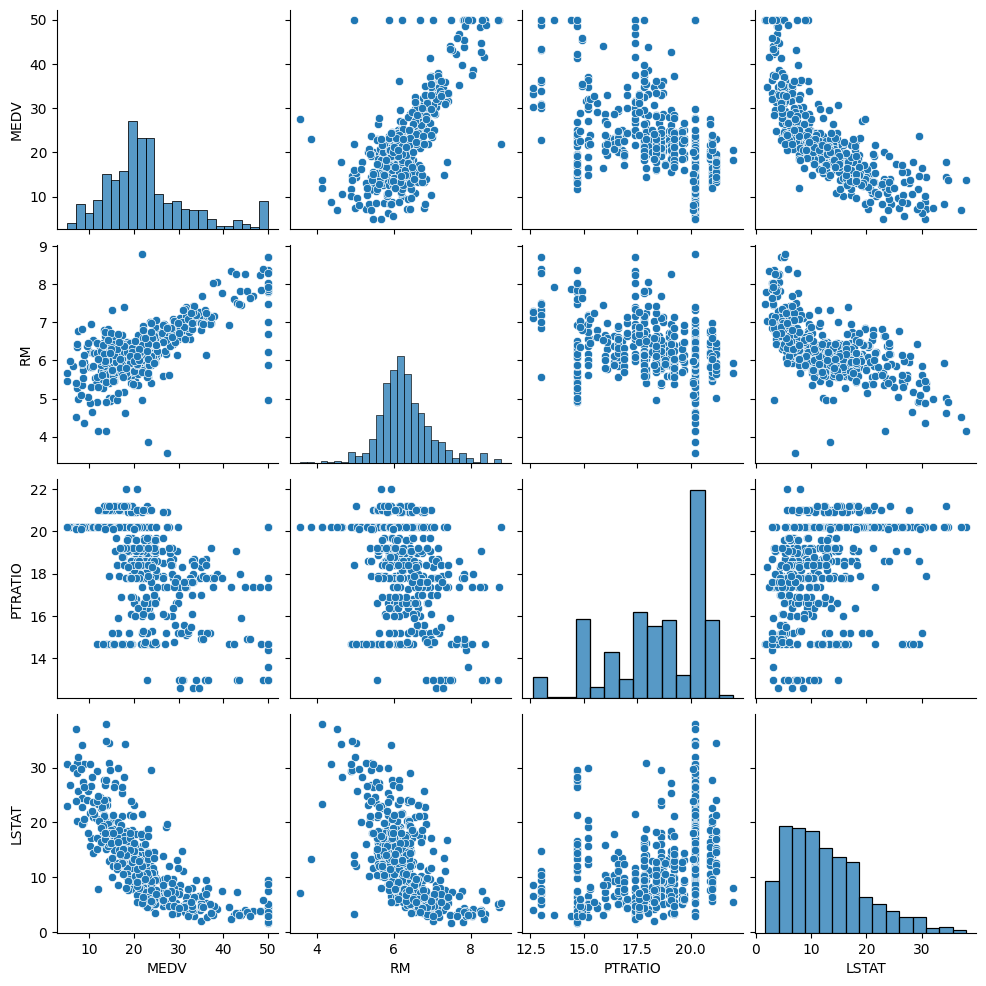

In [16]:
sns.pairplot(data.loc[:, ["MEDV","RM","PTRATIO","LSTAT"]])

- The plot shows a positive strong correlation between the MEDV (median value) and the RM (room number).
- However, the median value has a maximum limit (at 50), I think this value means 50+ correctly. I think, the data was truncated due to its long right tail.
- Visually, the negative correlation between MEDV and PTRATIO is not so clear.
- However, plot shows the high negative correlation between the MEDV and LSTAT variables.

Finally, I'll plot the histograms and the box plot (to visualize outliers) in case of every variables with this utility function.

In [17]:
def hist_box_plots(dataframe):
    for variable in dataframe.columns:
        # setup the figure and axes
        fig = plt.figure(figsize=(10,6))
        bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
                                                    # (adjust as necessary)
        histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
                                                    # bottom + height on this line should
                                                    # equal bottom on bpAx line
        fig.suptitle(t=variable, fontsize=20)
        # plot stuff
        bp = bpAx.boxplot(data[variable], notch=True, vert=False)
        h = histAx.hist(data[variable], bins=30)

        # confirm that the axes line up 
        xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
        for ax in [bpAx, histAx]:
            ax.set_xlim([xlims.min(), xlims.max()])

        bpAx.set_xticklabels([])  # clear out overlapping xlabels
        bpAx.set_yticks([])  # don't need that 1 tick mark
        plt.show()

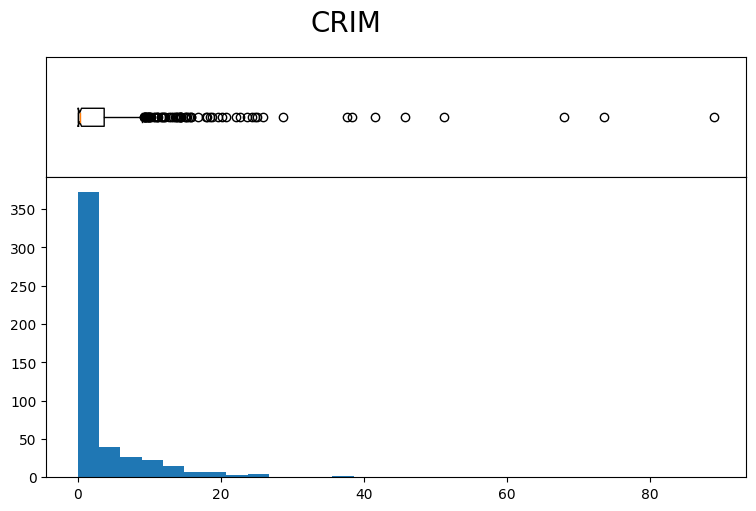

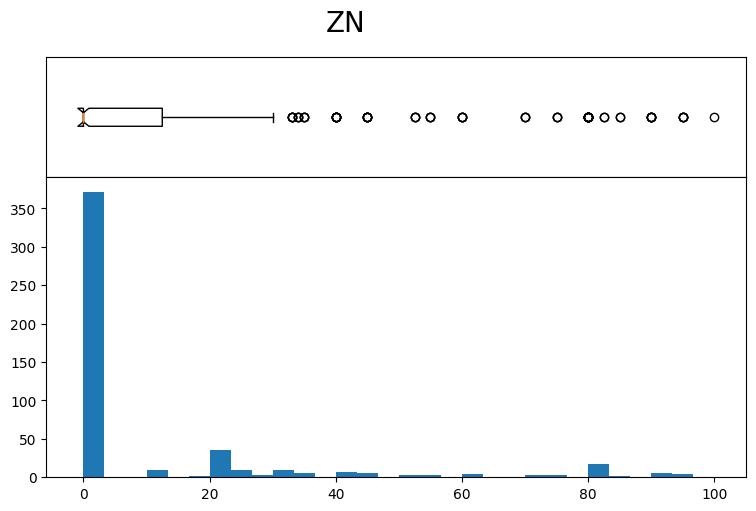

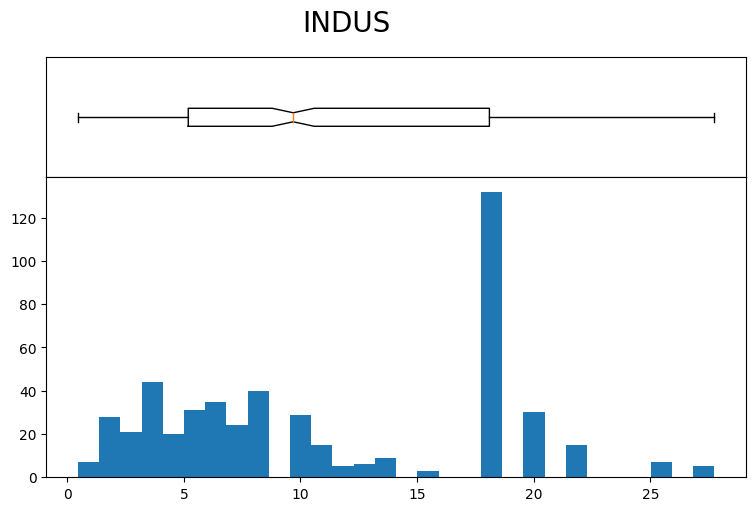

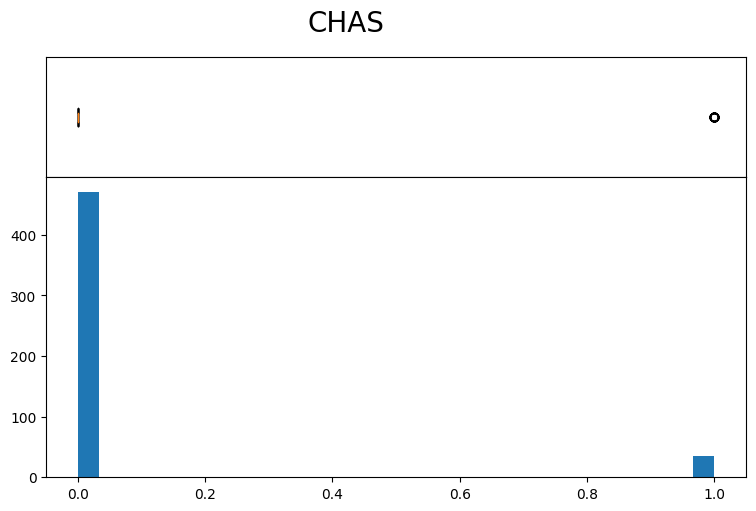

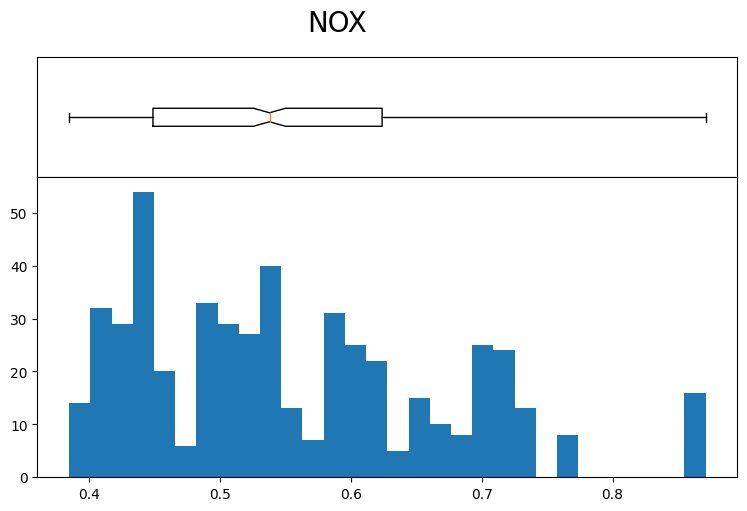

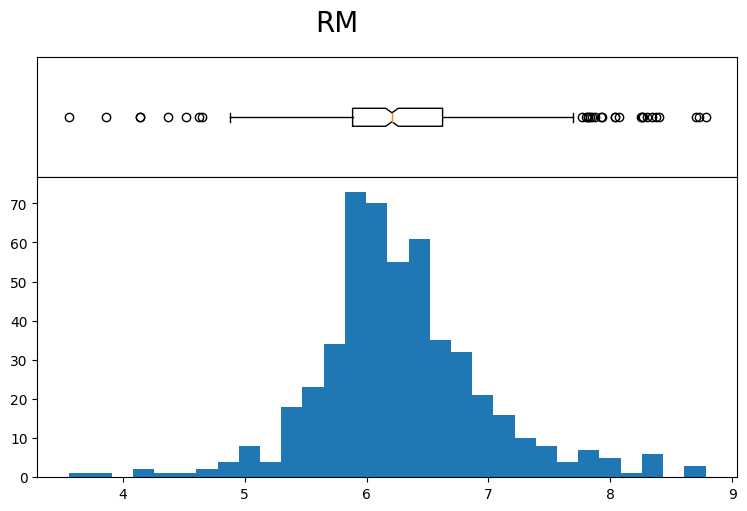

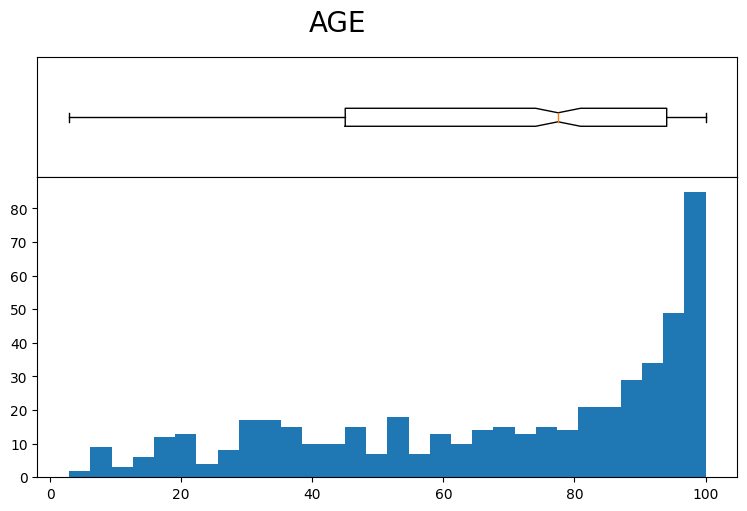

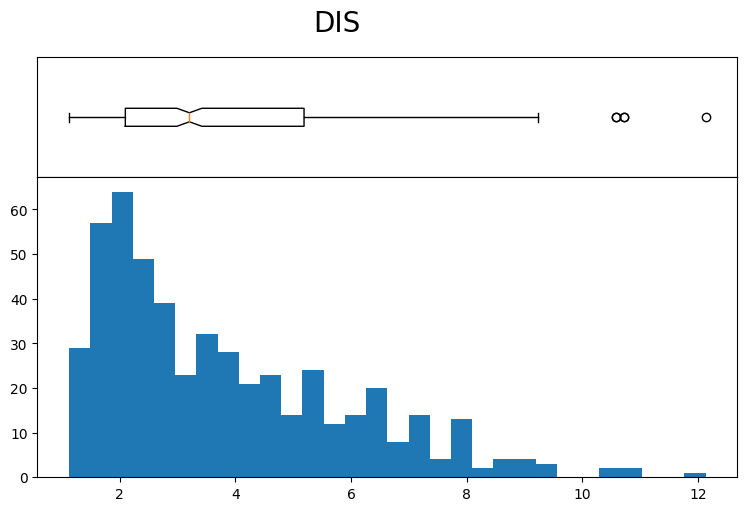

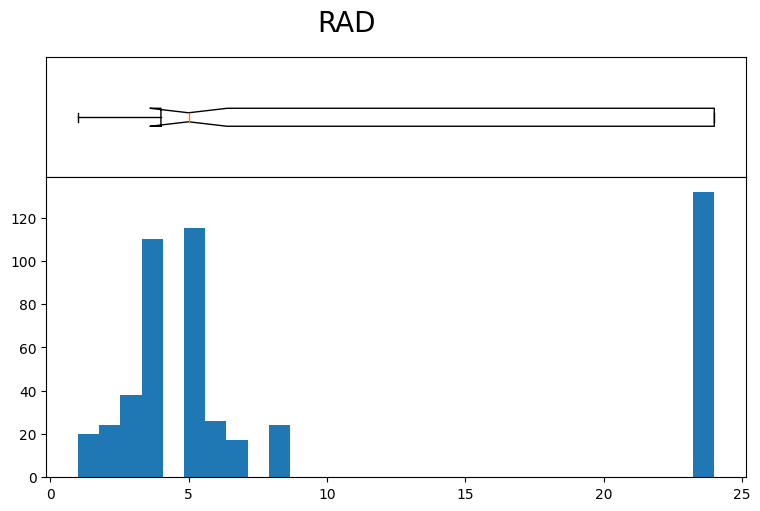

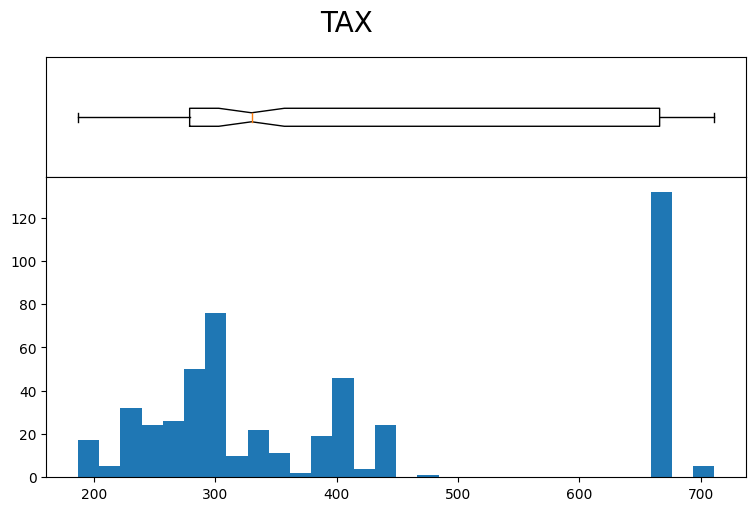

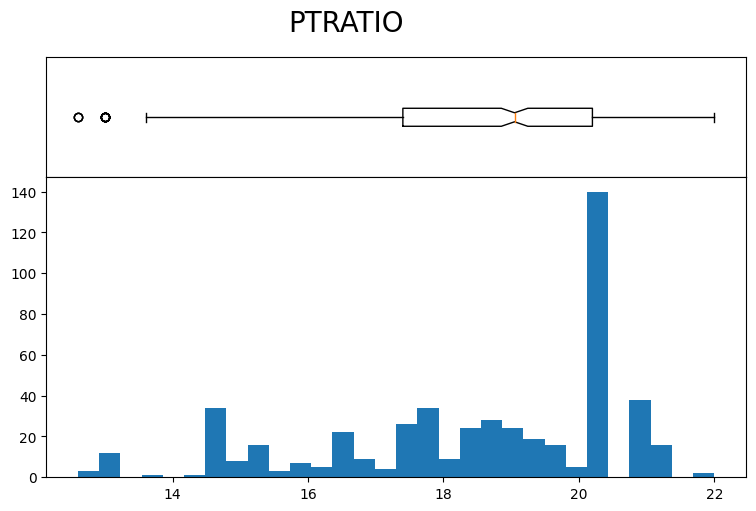

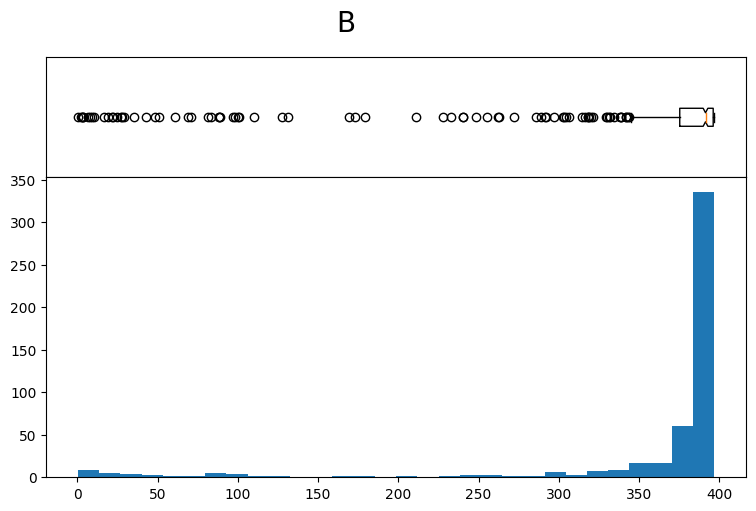

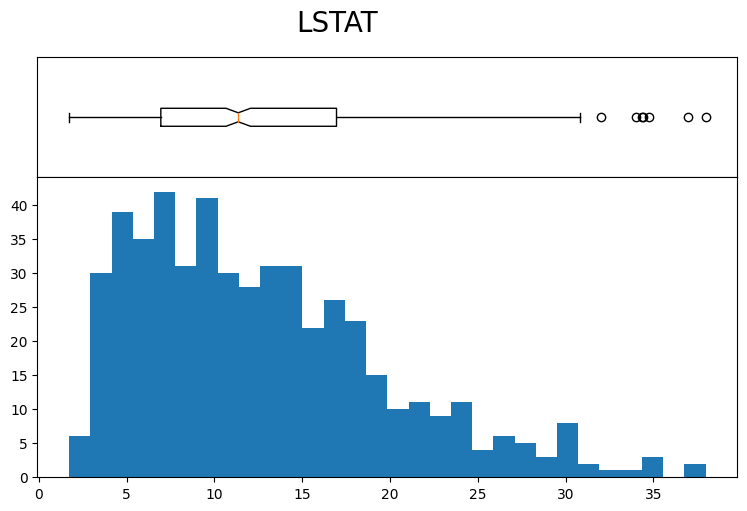

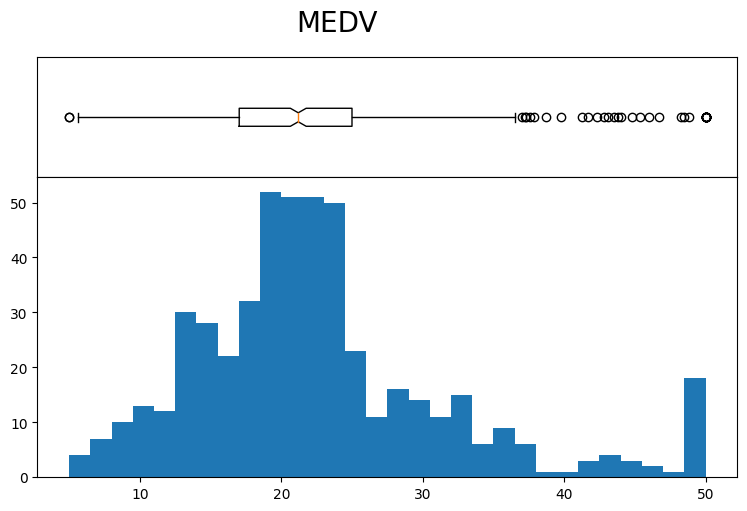

In [18]:
hist_box_plots(data)

According to the box plots, 8 out of 14 variables contain outliers (higher/lower values than 1.5 x Upper/Lower percentiles values):
- CRIM, ZN, RM, DIS, PTRATIO, B, LSTAT, MEDV
The distribution of variables is diverse:
- The most frequent distributions are the left/right skewed distributions (AGE/CRIM)
- Normal distribution is not frequent (RM)
- INDUS variable has a secondary frequency peak, it slightly looks like a bimodal distribution

Tests were not carried out to identify distributions, the above is only interpretation of histograms. 